### Notebook for the Problem Set in Machine Learning 


#### Exercise 1

Write a program that compares the performance of the three mean estimators.
- Empirical Mean
- Trimmed Mean
- Median-of-Means Estimator

To evaluate the performance, generate i.i.d random variables, compute the estimated mean $m_n$ and generate a large number of independent data points to estimate $P(|m_n -m | > \epsilon)$ for a wide range of choices of $\epsilon$ and $n$. For median-of means estimator try various values of the block size and similarly for the trimmed-mean estimator.

Generat distributions for both light (Gaussian, Laplace) and heavy tailed distributions (Pareto, Students-t, different degrees of freedom).

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

Defining the median of means estimator:

In [42]:
# Function for the median of means estimator
def median_of_means(data,k):
    
    # Get length of data
    n = len(data)
    
    # Split data into blocks
    blocks = [data[i * (n // k) + min(i, n % k):(i+1) * (n // k) + min(i+1, n % k)] for i in range(k)]
    
    # Calculate means
    means = [np.mean(block) for block in blocks] 
    
    # Return the median of the means of the blocks
    return(np.median(means))

def calculate_prob(means,epsilon,m):
    probs= [(np.sum(np.abs(np.array(means) - m)>eps)/len(means)) for eps in epsilon]
    return probs

### Comparing estimators for Gaussian distribution

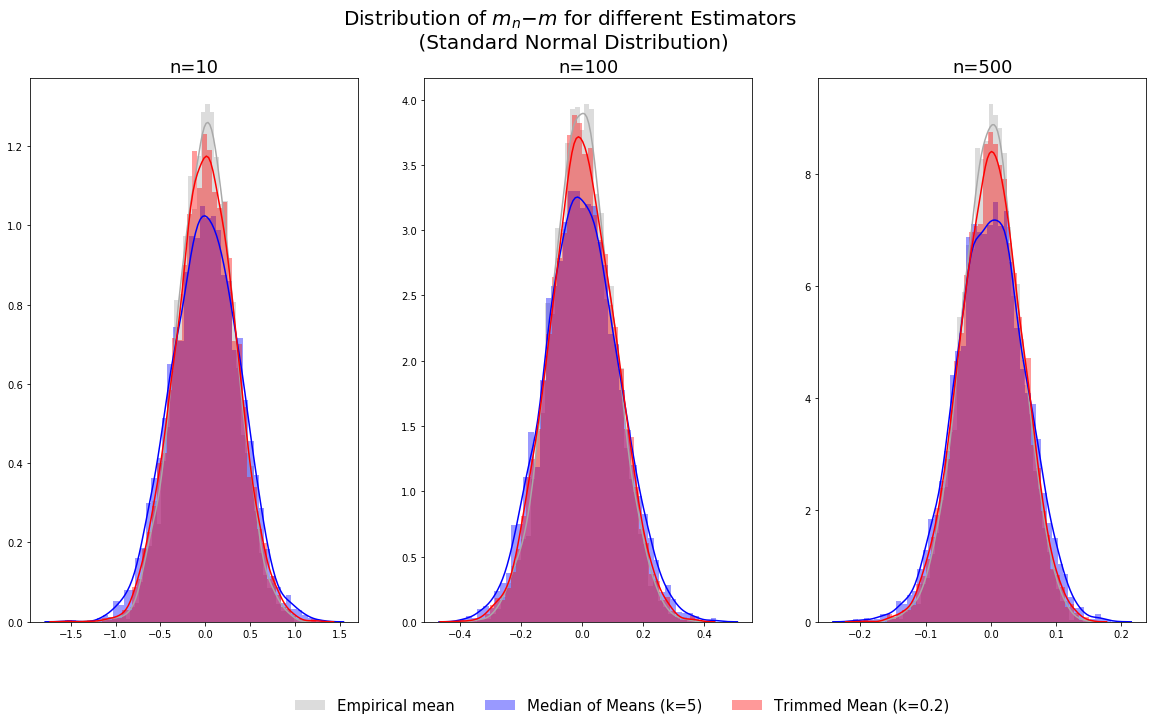

In [55]:
# Distribution of error

# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,500]

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(20,10))

blocks = 5
trim = 0.2

for i, n in enumerate(sample_size):

    # Generate data
    data = np.random.randn(n,rounds)
         
        
    mean = np.mean(data,axis = 0)
    mom = [median_of_means(sample,blocks) for sample in np.split(data,rounds,axis=1)]
    trm = stats.trim_mean(data,0.2,axis=0)

    # Plot
    sns.distplot(mean,kde=True,label= "Mean", ax = ax[i], color = "darkgrey",norm_hist=True)
    sns.distplot(mom,kde = True, label ="Median of Means", ax = ax[i], color ="blue", norm_hist=True)
    sns.distplot(trm,kde= True,label ="Trimmed Mean", ax = ax[i], color = "red", norm_hist=True)
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)

 
    
fig.legend(["Empirical mean",f"Median of Means (k={blocks})", f"Trimmed Mean (k={trim})"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 3)

            
fig.suptitle("Distribution of $m_n−m$ for different Estimators \n (Standard Normal Distribution)",fontsize = 20);
fig.savefig("01_Figures/Gaussian_Distribution_k5", dpi=80)

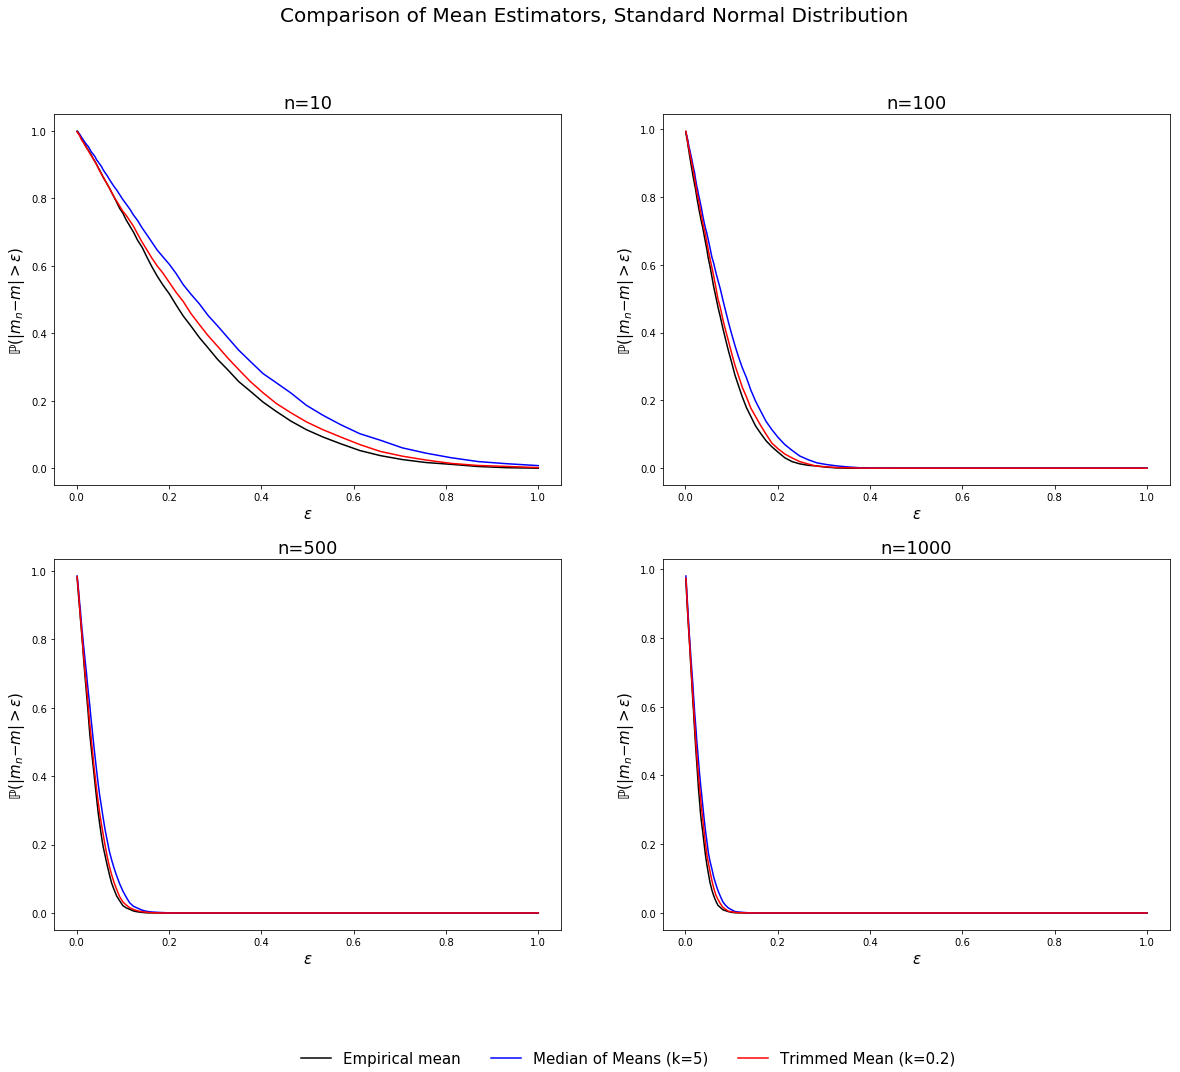

In [51]:
# Distribution of error

# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,500,1000]

# Epsilons to consider
epsilon = np.logspace(-3,0,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

blocks = 5
trim = 0.2

for i, n in enumerate(sample_size):

    # Generate data
    data = np.random.randn(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Median of Means
    mom = [median_of_means(sample,blocks) for sample in np.split(data,rounds,axis=1)]
    probs_mom = calculate_prob(mom,epsilon,0)
    
    # Trimmed Mean
    trm = stats.trim_mean(data,trim,axis=0)
    probs_trm = calculate_prob(trm,epsilon,0)
    if i == 0 or i == 1:
        ax[0,i].plot(epsilon,probs_mean, color = "black")
        ax[0,i].plot(epsilon,probs_mom, color = "blue")
        ax[0,i].plot(epsilon,probs_trm, color = "red")
        ax[0,i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
    else:
        ax[1,i-2].plot(epsilon,probs_mean, color = "black")
        ax[1,i-2].plot(epsilon,probs_mom, color = "blue")
        ax[1,i-2].plot(epsilon,probs_trm, color = "red")
        ax[1,i-2].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    for i in a:
        i.set_xlabel("$\epsilon$",fontsize=15)
        i.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean",f"Median of Means (k={blocks})", f"Trimmed Mean (k={trim})"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 3)

            
fig.suptitle("Comparison of Mean Estimators, Standard Normal Distribution",fontsize = 20);
fig.savefig("01_Figures/Gaussian_Base", dpi=80)

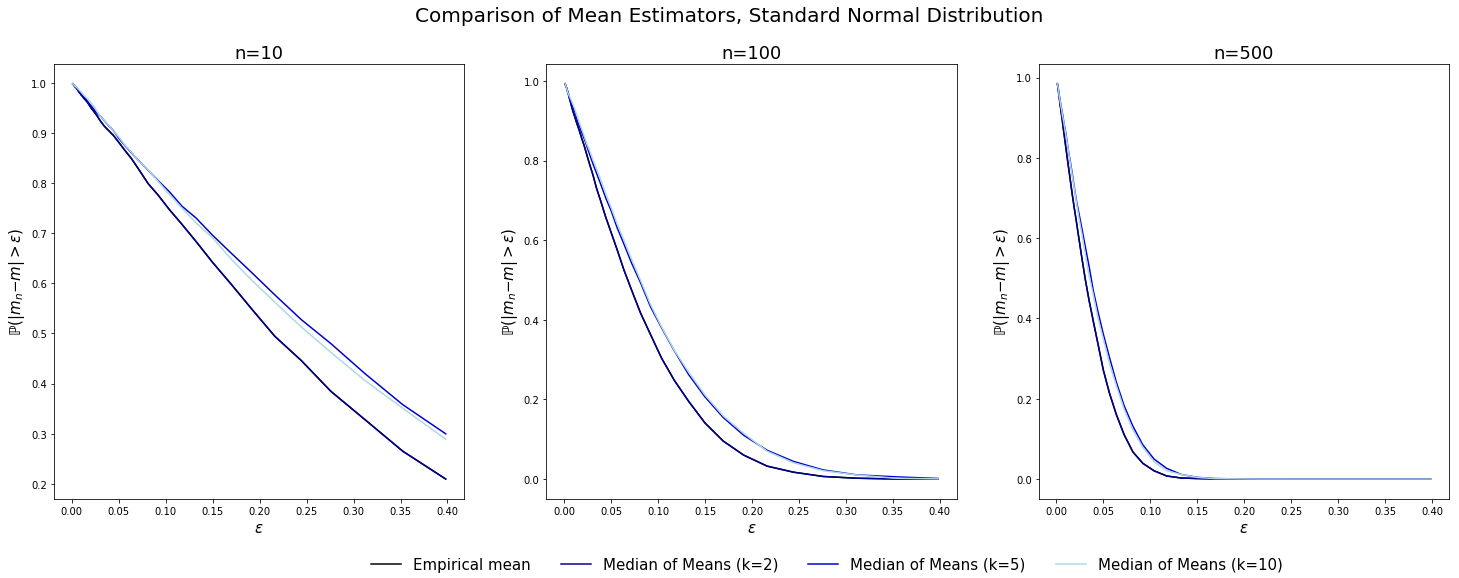

In [48]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,500]

# Epsilons to consider
epsilon = np.logspace(-3,-0.4)

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(25,8))

blocks = 10
trim = 0.4

for i, n in enumerate(sample_size):

    # Generate aData
    data = np.random.randn(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Median of Means
    mom5 = [median_of_means(sample,2) for sample in np.split(data,rounds,axis=1)]
    probs_mom5 = calculate_prob(mom5,epsilon,0)
    
    # Median of Means
    mom10 = [median_of_means(sample,5) for sample in np.split(data,rounds,axis=1)]
    probs_mom10 = calculate_prob(mom10,epsilon,0)
    
    # Median of Means
    mom20 = [median_of_means(sample,10) for sample in np.split(data,rounds,axis=1)]
    probs_mom20 = calculate_prob(mom20,epsilon,0)


    ax[i].plot(epsilon,probs_mean, color = "black")
    ax[i].plot(epsilon,probs_mom5, color = "darkblue")
    ax[i].plot(epsilon,probs_mom10, color = "mediumblue")
    ax[i].plot(epsilon,probs_mom20, color = "lightblue")
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    a.set_xlabel("$\epsilon$",fontsize=15)
    a.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean","Median of Means (k=2)", "Median of Means (k=5)", "Median of Means (k=10)"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 4, )

            
fig.suptitle("Comparison of Mean Estimators, Standard Normal Distribution",fontsize = 20);
fig.savefig("01_Figures/Gaussian_MoM", dpi=80)

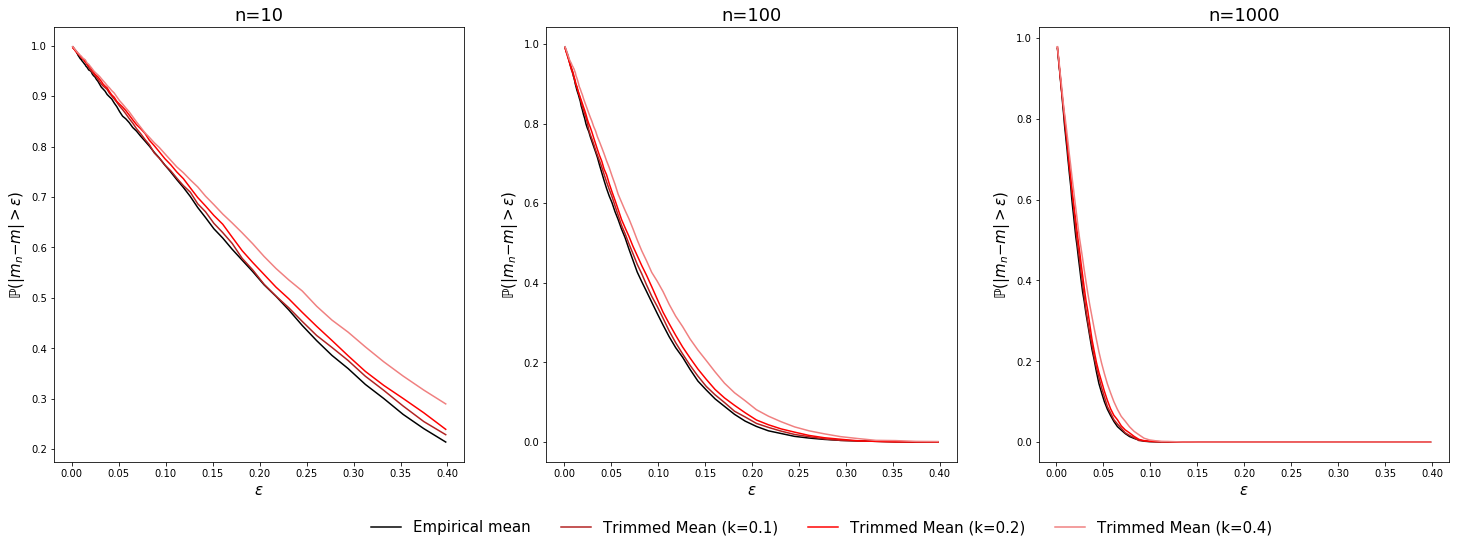

In [50]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,1000]

# Epsilons to consider
epsilon = np.logspace(-3,-0.4,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(25,8))

for i, n in enumerate(sample_size):

    # Generate aData
    data = np.random.randn(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Trimmed Mean
    trm01 = stats.trim_mean(data,0.1,axis=0)
    probs_trm01 = calculate_prob(trm01,epsilon,0)
    
    # Trimmed Mean
    trm02 = stats.trim_mean(data,0.2,axis=0)
    probs_trm02 = calculate_prob(trm02,epsilon,0)
    
    # Trimmed Mean
    trm04 = stats.trim_mean(data,0.4,axis=0)
    probs_trm04 = calculate_prob(trm04,epsilon,0)    
    
    ax[i].plot(epsilon,probs_mean, color = "black")
    ax[i].plot(epsilon,probs_trm01, color = "firebrick")
    ax[i].plot(epsilon,probs_trm02, color = "red")
    ax[i].plot(epsilon,probs_trm04, color = "lightcoral")
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    a.set_xlabel("$\epsilon$",fontsize=15)
    a.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean","Trimmed Mean (k=0.1)", "Trimmed Mean (k=0.2)", "Trimmed Mean (k=0.4)"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 4);

            
#fig.suptitle("Comparison of Mean Estimators, Standard Normal Distribution",fontsize = 20);
fig.savefig("01_Figures/Gaussian_TrM", dpi=80)

# Comparing estimators for Student's T Distribution

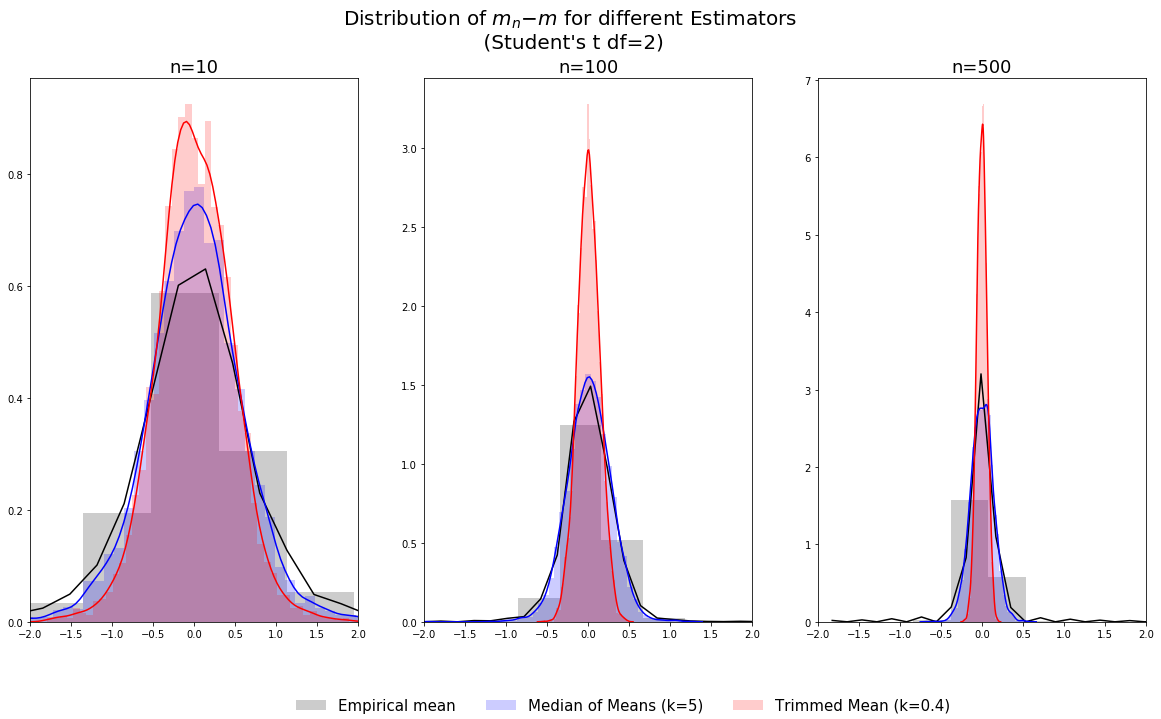

In [86]:
# Distribution of error

# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,500]

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(20,10))

blocks = 5
trim = 0.4

df = 2
for i, n in enumerate(sample_size):

    # Generate data
    data = np.random.standard_t(df,size=n*rounds).reshape(n,rounds)
         
        
    mean = np.mean(data,axis = 0)
    mom = [median_of_means(sample,blocks) for sample in np.split(data,rounds,axis=1)]
    trm = stats.trim_mean(data,0.2,axis=0)

    # Plot
    sns.distplot(mean,kde=True,label= "Mean", ax = ax[i], color = "black",norm_hist=True,hist_kws=dict(alpha=0.2))
    sns.distplot(mom,kde = True, label ="Median of Means", ax = ax[i], color ="blue", norm_hist=True, hist_kws=dict(alpha=0.2))
    sns.distplot(trm,kde= True,label ="Trimmed Mean", ax = ax[i], color = "red", norm_hist=True, hist_kws=dict(alpha=0.2))
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
    ax[i].set_xlim([-2,2])

for a in ax:
    a.set_xlabel("",fontsize=15)
    a.set_ylabel("",fontsize=15)
    
fig.legend(["Empirical mean",f"Median of Means (k={blocks})", f"Trimmed Mean (k={trim})"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 3)

            
fig.suptitle(f"Distribution of $m_n−m$ for different Estimators \n (Student's t df={df})",fontsize = 20);
fig.savefig(f"01_Figures/Studentsdf{df}_Dist_k{blocks}", dpi=80)

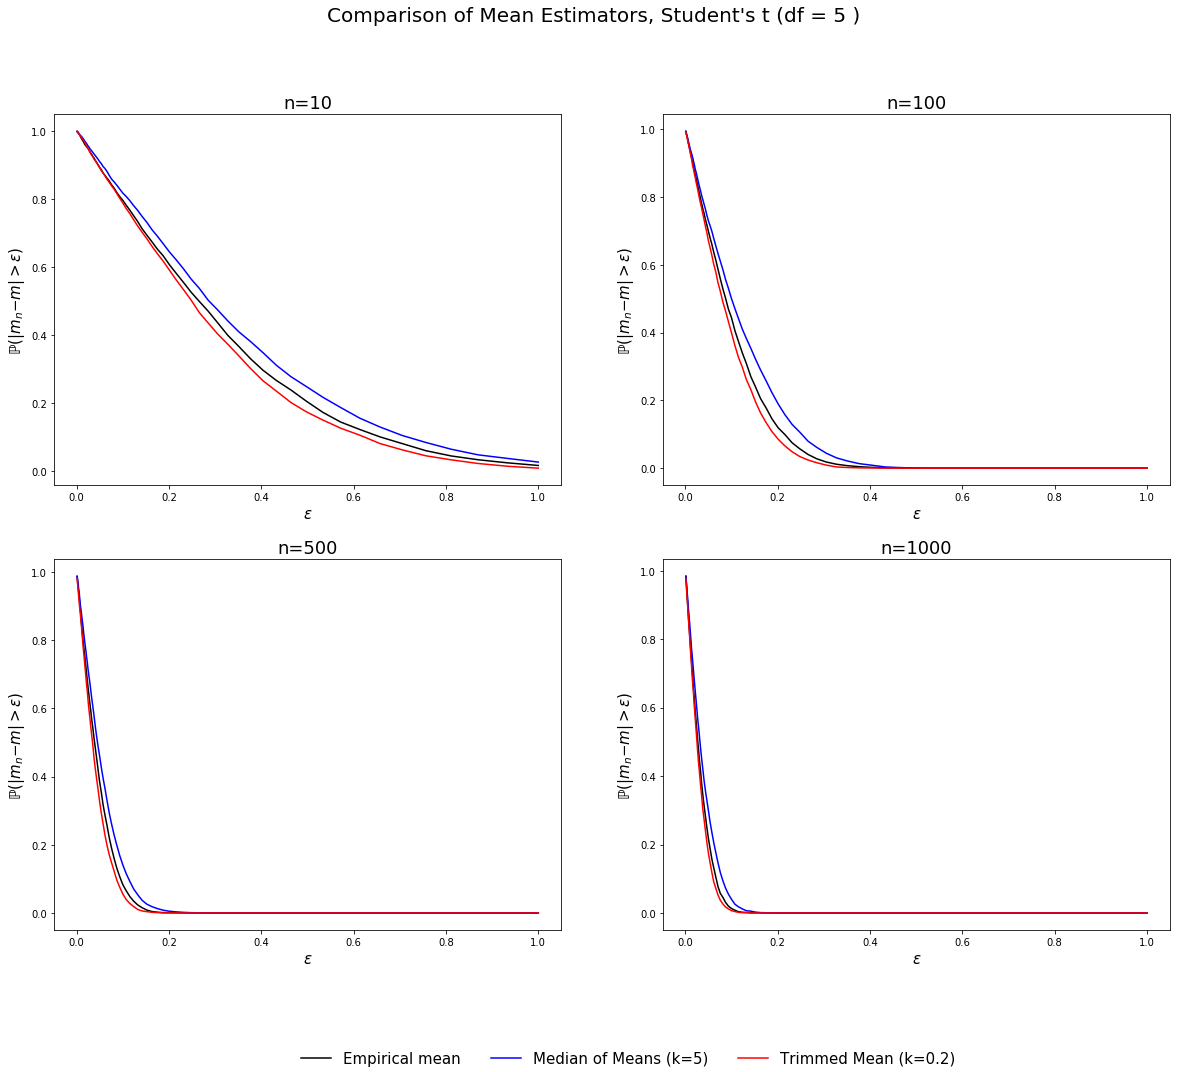

In [60]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,100,500,1000]

# Epsilons to consider
epsilon = np.logspace(-3,0,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

blocks = 5
trim = 0.2

df = 5

for i, n in enumerate(sample_size):

    # Generate aData
    data = np.random.standard_t(df,size=n*rounds).reshape(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Median of Means
    mom = [median_of_means(sample,blocks) for sample in np.split(data,rounds,axis=1)]
    probs_mom = calculate_prob(mom,epsilon,0)
    
    # Trimmed Mean
    trm = stats.trim_mean(data,0.2,axis=0)
    probs_trm = calculate_prob(trm,epsilon,0)
    if i == 0 or i == 1:
        ax[0,i].plot(epsilon,probs_mean, color = "black")
        ax[0,i].plot(epsilon,probs_mom, color = "blue")
        ax[0,i].plot(epsilon,probs_trm, color = "red")
        ax[0,i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
    else:
        ax[1,i-2].plot(epsilon,probs_mean, color = "black")
        ax[1,i-2].plot(epsilon,probs_mom, color = "blue")
        ax[1,i-2].plot(epsilon,probs_trm, color = "red")
        ax[1,i-2].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    for i in a:
        i.set_xlabel("$\epsilon$",fontsize=15)
        i.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean",f"Median of Means (k={blocks})", f"Trimmed Mean (k={trim})"],frameon=False
           ,fontsize = 15,loc = (0.25,0),ncol = 3)

            
fig.suptitle(f"Comparison of Mean Estimators, Student's t (df = {df} )",fontsize = 20);
fig.savefig(f"01_Figures/Students_{df}df", dpi=80)

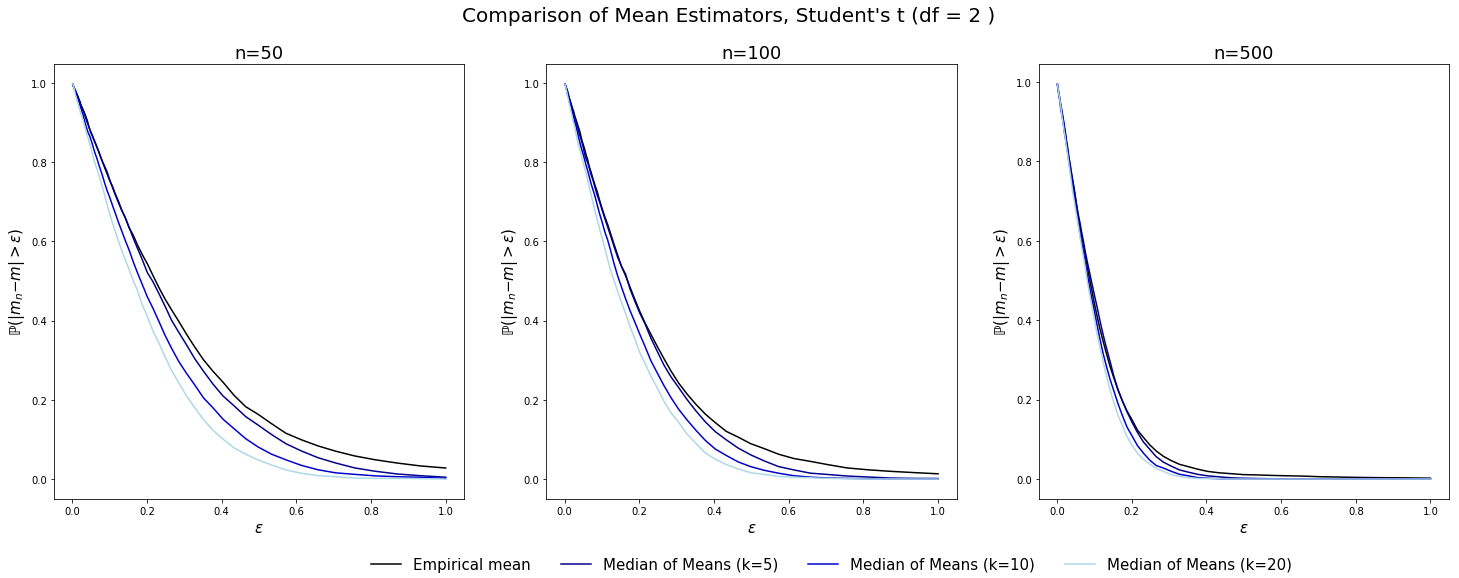

In [61]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [50,100,500]

# Epsilons to consider
epsilon = np.logspace(-3,0,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(25,8))

df = 2
m = 0

for i, n in enumerate(sample_size):

    # Generate aData
    data = np.random.standard_t(2,size=n*rounds).reshape(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Median of Means
    mom5 = [median_of_means(sample,5) for sample in np.split(data,rounds,axis=1)]
    probs_mom5 = calculate_prob(mom5,epsilon,0)
    
    # Median of Means
    mom10 = [median_of_means(sample,10) for sample in np.split(data,rounds,axis=1)]
    probs_mom10 = calculate_prob(mom10,epsilon,0)
    
    # Median of Means
    mom20 = [median_of_means(sample,20) for sample in np.split(data,rounds,axis=1)]
    probs_mom20 = calculate_prob(mom20,epsilon,0)


    ax[i].plot(epsilon,probs_mean, color = "black")
    ax[i].plot(epsilon,probs_mom5, color = "darkblue")
    ax[i].plot(epsilon,probs_mom10, color = "mediumblue")
    ax[i].plot(epsilon,probs_mom20, color = "lightblue")
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)       

for a in ax:
    a.set_xlabel("$\epsilon$",fontsize=15)
    a.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean","Median of Means (k=5)", "Median of Means (k=10)", "Median of Means (k=20)"],frameon=False
           ,fontsize = 15,loc = (0.25,0),ncol = 4)

            
fig.suptitle(f"Comparison of Mean Estimators, Student's t (df = {df} )",fontsize = 20);
fig.savefig(f"01_Figures/Students_MoM_{df}df", dpi=80)

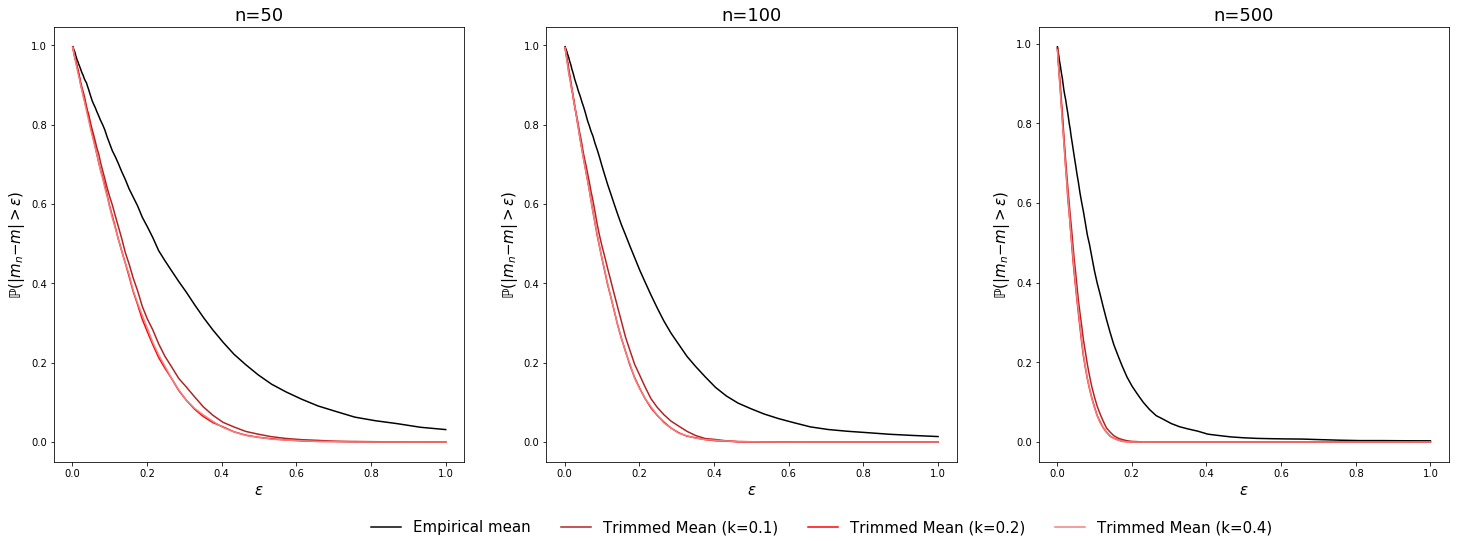

In [62]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [50,100,500]

# Epsilons to consider
epsilon = np.logspace(-3,0,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=1,ncols=3, figsize=(25,8))

df = 2
m = 0

for i, n in enumerate(sample_size):

    # Generate aData
    data = np.random.standard_t(2,size=n*rounds).reshape(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,0)
    
    # Trimmed Mean
    trm01 = stats.trim_mean(data,0.1,axis=0)
    probs_trm01 = calculate_prob(trm01,epsilon,0)
    
    # Trimmed Mean
    trm02 = stats.trim_mean(data,0.2,axis=0)
    probs_trm02 = calculate_prob(trm02,epsilon,0)
    
    # Trimmed Mean
    trm04 = stats.trim_mean(data,0.4,axis=0)
    probs_trm04 = calculate_prob(trm04,epsilon,0)    
    
    ax[i].plot(epsilon,probs_mean, color = "black")
    ax[i].plot(epsilon,probs_trm01, color = "firebrick")
    ax[i].plot(epsilon,probs_trm02, color = "red")
    ax[i].plot(epsilon,probs_trm04, color = "lightcoral")
    ax[i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    a.set_xlabel("$\epsilon$",fontsize=15)
    a.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean","Trimmed Mean (k=0.1)", "Trimmed Mean (k=0.2)", "Trimmed Mean (k=0.4)"],frameon=False,
           fontsize = 15,loc = (0.25,0),ncol = 4)

            
#fig.suptitle(f"Comparison of Mean Estimators, Student's t (df = {df} )",fontsize = 20);
fig.savefig(f"01_Figures/Students_TrM_{df}df", dpi=80)

# Pareto

In [ ]:
# Number of rounds and sample size for each round
rounds = 5000
sample_size = [10,50,100,500]

# Epsilons to consider
epsilon = np.logspace(-3,0,100)

# Setting up the plot
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

blocks = 10
trim = 0.2

# Distribution parameters for Pareto
alpha = 10
xm = 1
m = (alpha*xm)/(alpha-1)
#s = (np.random.pareto(a, 1000) + 1) * m

for i, n in enumerate(sample_size):

    # Generate aData
    data = ((np.random.pareto(alpha, n*rounds) + 1)*xm).reshape(n,rounds)
    
    # Mean 
    mean = np.mean(data,axis= 0)
    probs_mean = calculate_prob(mean,epsilon,m)
    
    # Median of Means
    mom = [median_of_means(sample,blocks) for sample in np.split(data,rounds,axis=1)]
    probs_mom = calculate_prob(mom,epsilon,m)
    
    # Trimmed Mean
    trm = stats.trim_mean(data,0.2,axis=0)
    probs_trm = calculate_prob(trm,epsilon,m)
    
    if i == 0 or i == 1:
        ax[0,i].plot(epsilon,probs_mean, color = "black")
        ax[0,i].plot(epsilon,probs_mom, color = "blue")
        ax[0,i].plot(epsilon,probs_trm, color = "red")
        ax[0,i].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
    else:
        ax[1,i-2].plot(epsilon,probs_mean, color = "black")
        ax[1,i-2].plot(epsilon,probs_mom, color = "blue")
        ax[1,i-2].plot(epsilon,probs_trm, color = "red")
        ax[1,i-2].set_title(f"n={n}",fontsize = 18,fontweight = 100)
        
for a in ax:
    for i in a:
        i.set_xlabel("$\epsilon$",fontsize=15)
        i.set_ylabel("$ℙ(|m_n−m|>\epsilon)$",fontsize=15)
    
fig.legend(["Empirical mean",f"Median of Means (k={blocks})", f"Trimmed Mean (k={trim})"],fontsize = 15,loc = 8,ncol = 3)

            
fig.suptitle(f"Comparison of Mean Estimators \n Pareto Distributino ($a$= {alpha}, $x_m$={xm})",fontsize = 20);
#fig.savefig("01_Figures/Pareto_a3", dpi=80)

# Random Projections

In [249]:
def random_projection(n):
    
    # Generate basis vectors in n
    basisMatrix = np.eye(n)
    
    w = np.random.normal(0,1/n,n*2).reshape(n,2)
    
    projection = basisMatrix @ w
    
    return projection 

In [363]:
  def dist_sq(X):
    nrow,ncol = X.shape
    dist = []
    for r in np.arange(nrow):
        ind = r+1
        while ind < nrow:
            #print(X[r,:],X[ind,:])
            dist.append( np.linalg.norm(X[r,:]- X[ind,:])**2   ) 
            ind = ind + 1           
    return np.array(dist)

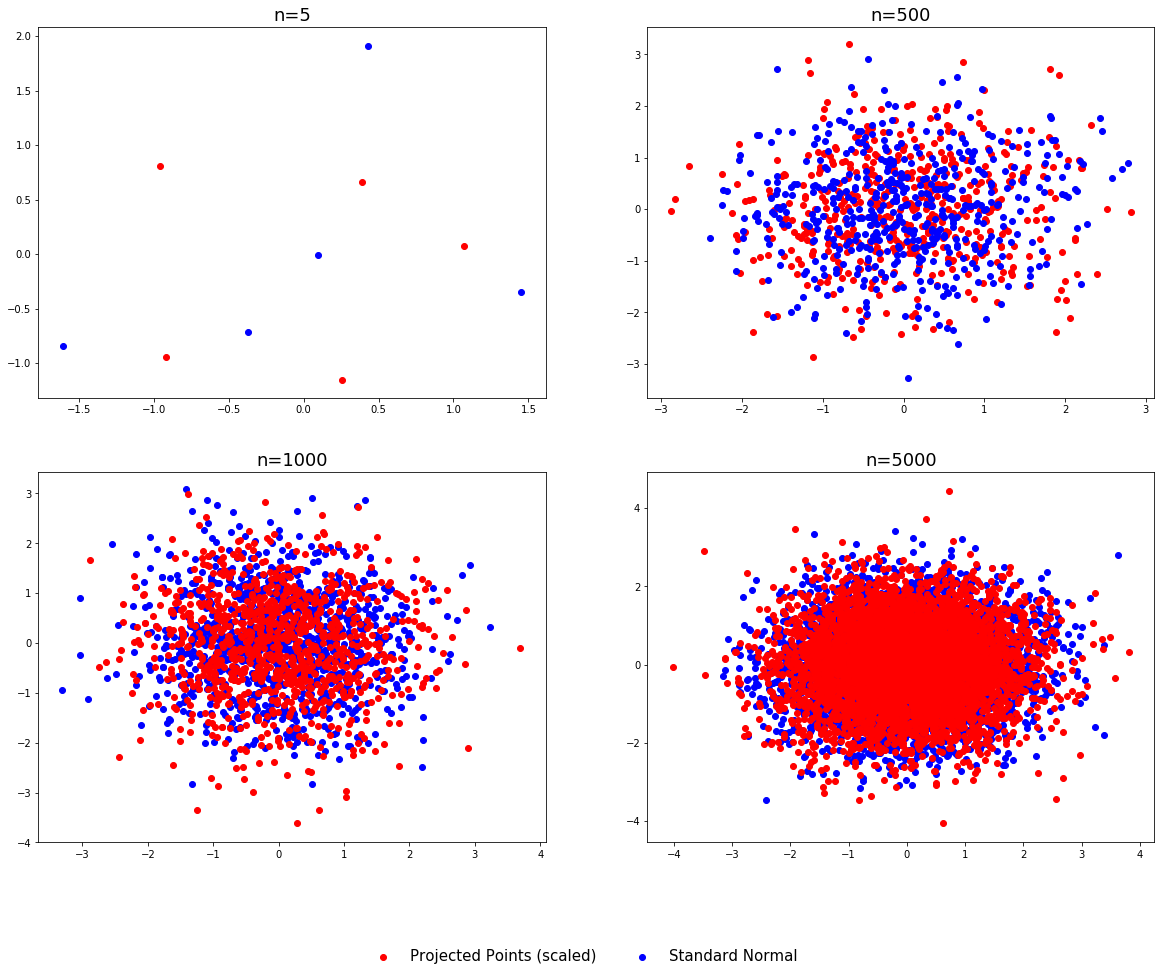

In [332]:
# Dimensions
n = [5,500,1000,5000]

#n = [5,10,50,100]
# Setting up the plot
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

for i,n in enumerate(n):
    
    data = random_projection(n)
    
    x = data[:,0]
    y = data[:,1]
    
    # Standardize
    x = (x - np.mean(x))/(np.sqrt(np.var(x)))
    y = (y - np.mean(y))/(np.sqrt(np.var(y)))

    # Generate n random points
    x_rand = np.random.randn(n)
    y_rand = np.random.randn(n)
    
    if i == 0 or i == 1:
        ax[0,i].scatter(x_rand,y_rand,color = "red")
        ax[0,i].scatter(x,y, color ="blue")

        ax[0,i].set_title(f"n={n}",fontsize = 18,fontweight = 100)

    else:
        ax[1,i-2].scatter(x,y, color ="blue")
        ax[1,i-2].scatter(x_rand,y_rand,color = "red") 
        ax[1,i-2].set_title(f"n={n}",fontsize = 18,fontweight = 100)

fig.legend(["Projected Points (scaled)","Standard Normal"],fontsize = 15,loc = 8,ncol = 3, frameon=False);
#fig.suptitle("Random Projections",fontsize = 20);
#fig.savefig("01_Figures/Random_Projections1", dpi=80)

In [ ]:
data = random_projection(100)
random = r

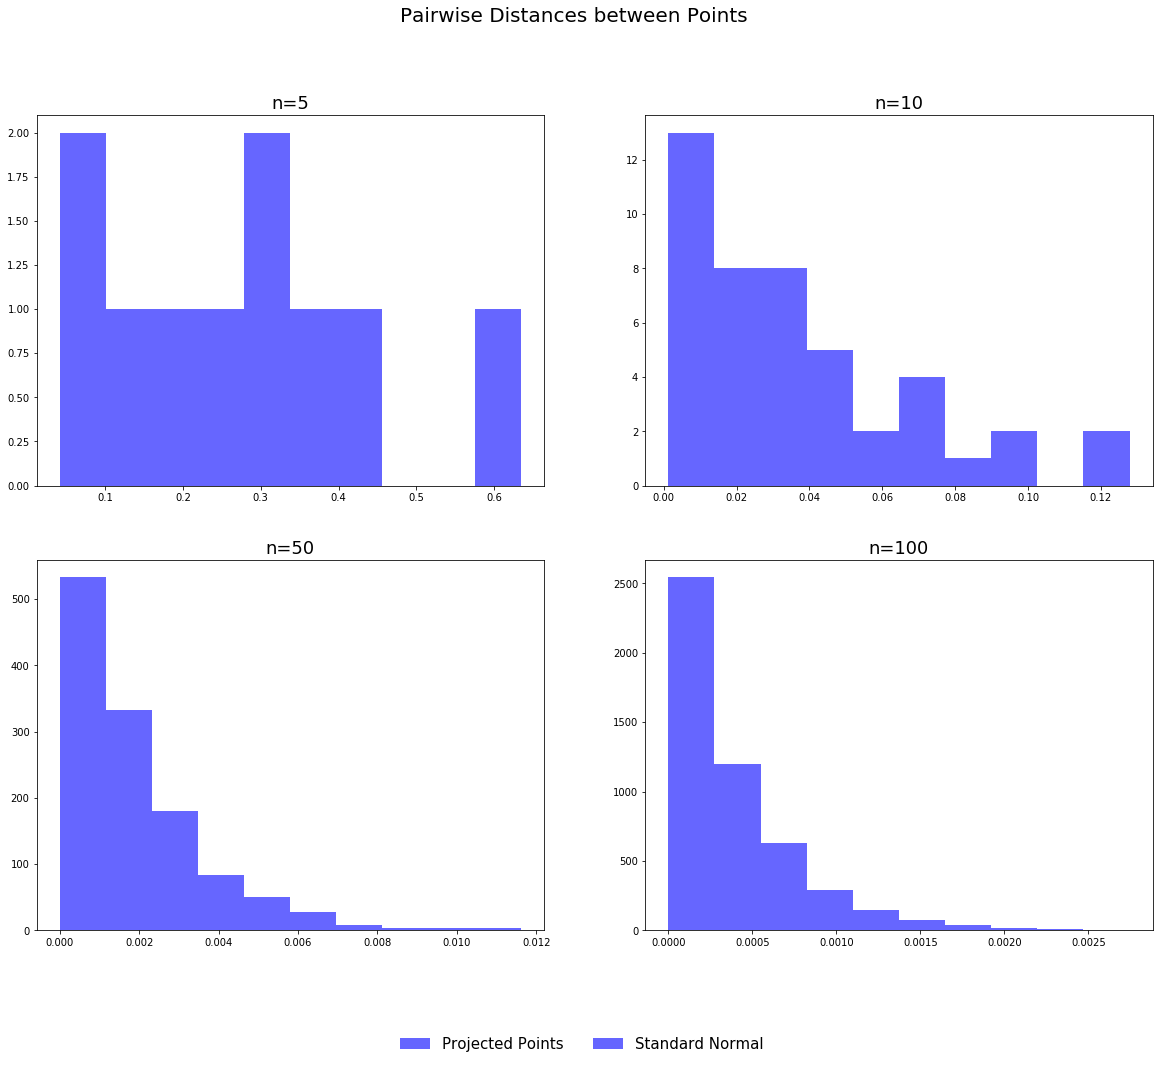

In [376]:
# Dimensions
#n = [5,100,1000,5000]

n = [5,10,50,100]
# Setting up the plot
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(20,15))

for i,n in enumerate(n):
    
    data = random_projection(n)
    
    # Standardize
    #data[:,0] = (data[:,0] - np.mean(data[:,0]))/(np.sqrt(np.var(data[:,0])))
    #data[:,1] = (data[:,1] - np.mean(data[:,1]))/(np.sqrt(np.var(data[:,1])))
    
    # Generate random data
    #random_data = np.random.normal(loc= 0,scale=1, size= n*2).reshape(n,2)
    
    # Plot the histogramm of the distances
    if i == 0 or i == 1:
        ax[0,i].hist(dist_sq(data), color ="blue", alpha = 0.6)
        #ax[0,i].hist(dist_sq(random_data), color ="red", alpha = 0.6)
        ax[0,i].set_title(f"n={n}",fontsize = 18,fontweight = 100)

    else:
        ax[1,i-2].hist(dist_sq(data), color ="blue", alpha = 0.6)
        #ax[1,i-2].hist(dist_sq(random_data), color ="red", alpha = 0.6)
        ax[1,i-2].set_title(f"n={n}",fontsize = 18,fontweight = 100)

fig.legend(["Projected Points","Standard Normal"],fontsize = 15,loc = 8,ncol = 3, frameon=False);
fig.suptitle("Pairwise Distances between Points ",fontsize = 20);
#fig.savefig("01_Figures/Random_Projections1", dpi=80)